## Import Lib

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

## Load Image

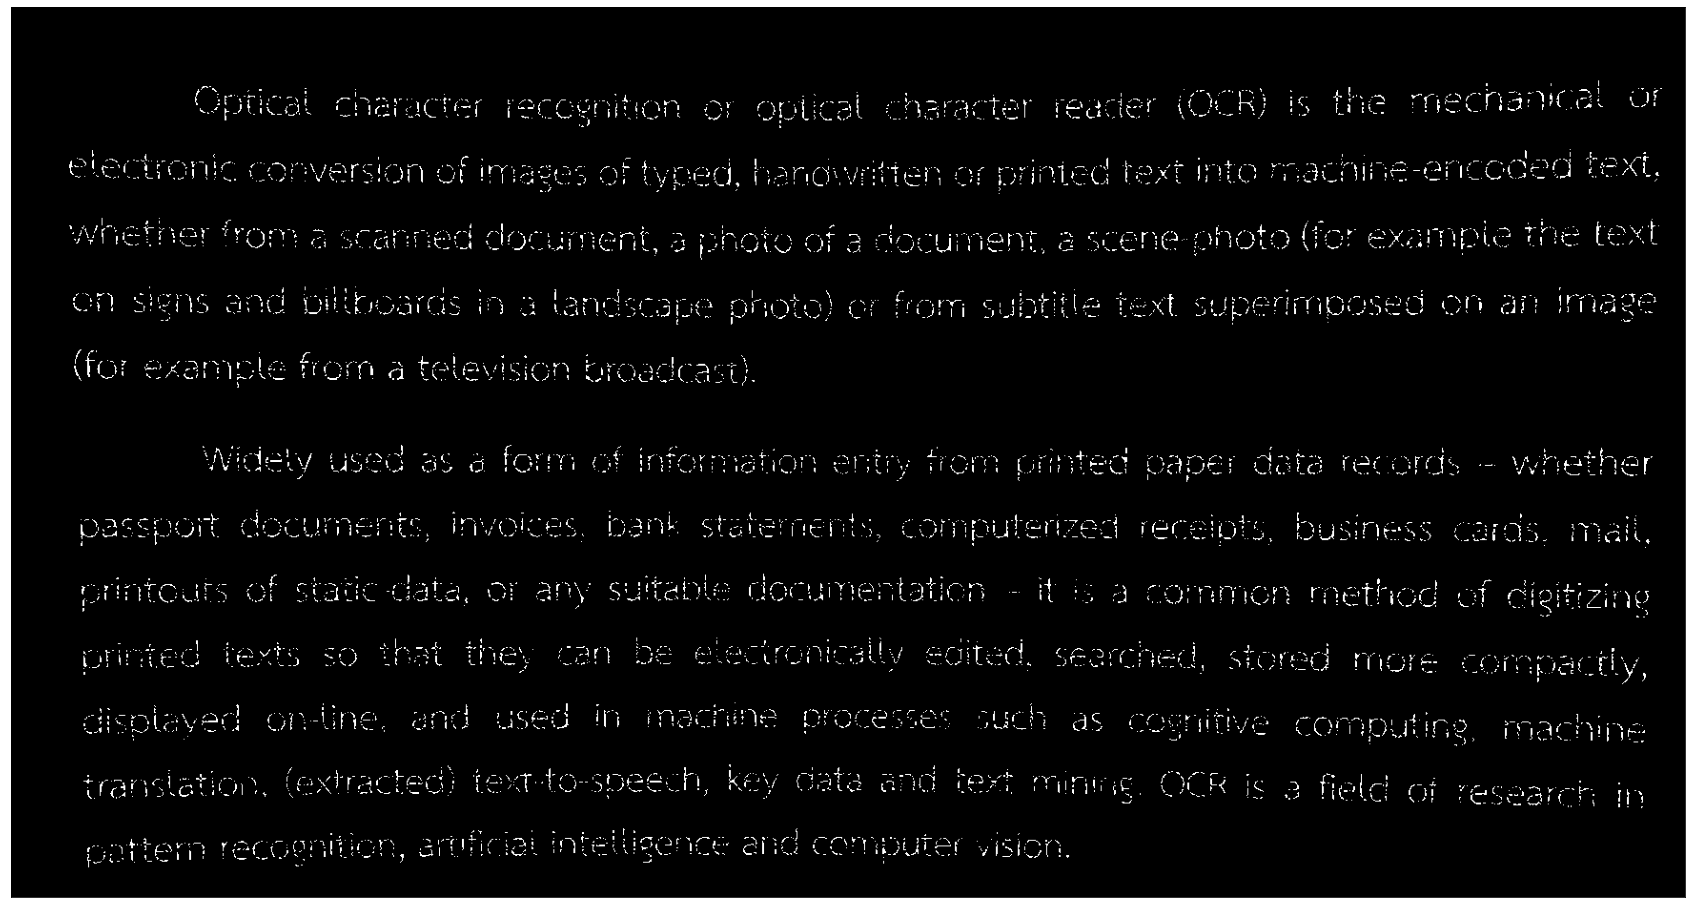

In [2]:
src = cv.imread("./BrokenText.png")
gray_img = cv.cvtColor(src,cv.COLOR_BGR2GRAY) ## ทำภาพขาว-เทา
_,bin_img = cv.threshold(gray_img,127,255,cv.THRESH_BINARY) ## ทำภาพขาว-ดำ ตัดที่ค่า 127

plt.rcParams["figure.figsize"] = [30, 18]   ## ขนาดภาพ
plt.imshow(bin_img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

In [3]:
rect3x3 = cv.getStructuringElement(cv.MORPH_RECT,(3,3)) ## พอกแบบ RECT ขนาด 3x3
cross3x3 = cv.getStructuringElement(cv.MORPH_CROSS,(3,3)) ## พอกแบบ CROSS ขนาด 3x3
ellipse3x3 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3)) ## พอกแบบ ELLIPSE ขนาด 3x3
 
rect5x5 = cv.getStructuringElement(cv.MORPH_RECT,(5,5)) ## พอกแบบ RECT ขนาด 5x5
cross5x5 = cv.getStructuringElement(cv.MORPH_CROSS,(5,5)) ## พอกแบบ CROSS ขนาด 5x5
ellipse5x5 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5)) ## พอกแบบ ELLIPSE ขนาด 5x5

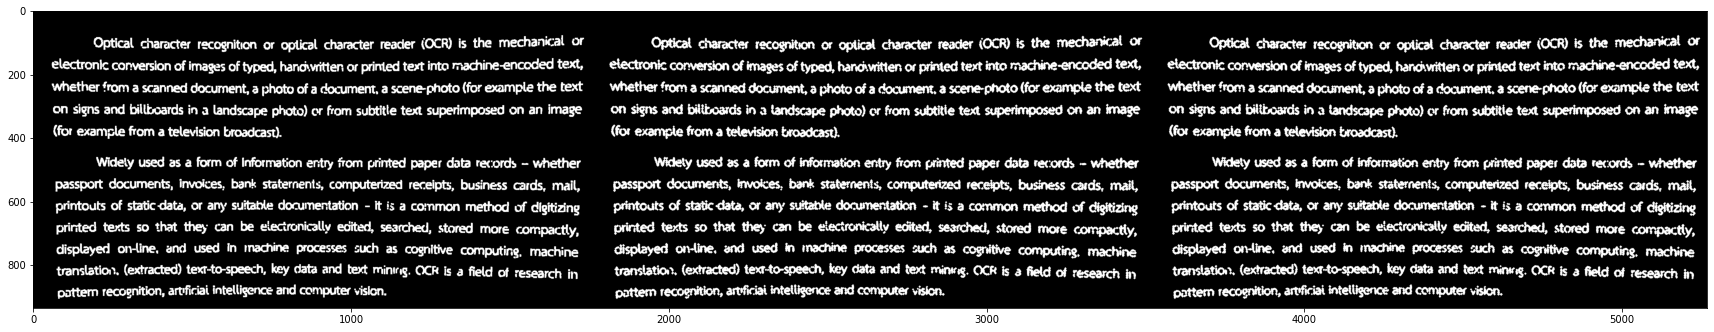

In [4]:
dilated_rect5x5_img = cv.dilate(bin_img,rect5x5,iterations=1) ## ใช้ rect5x5 วนซ้ำรูปต้นฉบับ 1 รอบ
dilated_cross3x3_img = cv.dilate(bin_img,cross3x3,iterations=3) ## ใช้ cross3x3 วนซ้ำรูปต้นฉบับ 3 รอบ
dilated_ellipse3x3_img = cv.dilate(bin_img,ellipse3x3,iterations=3) ## ใช้ ellipse3x3 วนซ้ำรูปต้นฉบับ 3 รอบ

## รวมรูป แสดงแบบแนวนอน
ALL_show_img = np.concatenate((dilated_rect5x5_img, dilated_cross3x3_img, dilated_ellipse3x3_img), axis = 1) 
plt.imshow(ALL_show_img, cmap='gray')

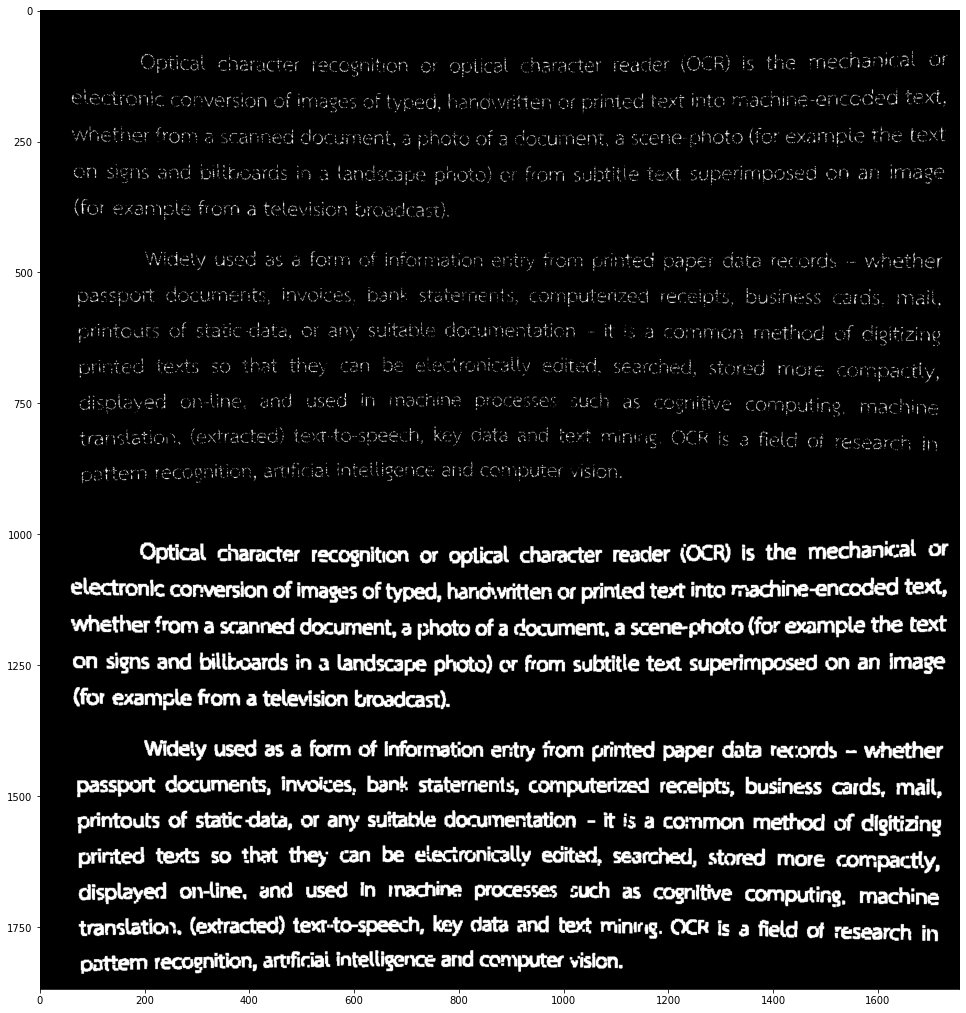

In [5]:
## แสดงรูปแนวตั้ง
ALL_show_result_img = np.concatenate((bin_img, dilated_rect5x5_img), axis=0)
plt.imshow(ALL_show_result_img, cmap='gray')